In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
KAGGLE_HOME_DIR = '/content/drive/MyDrive/Patatos_Project /dataset'
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS = 50

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os

**Read data**

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    KAGGLE_HOME_DIR,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE

)

Found 2152 files belonging to 4 classes.


In [ ]:
class_labels = dataset.class_names
class_labels

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'models']

(32, 256, 256, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 1, 0, 2, 0, 0, 1, 1], dtype=int32)>>


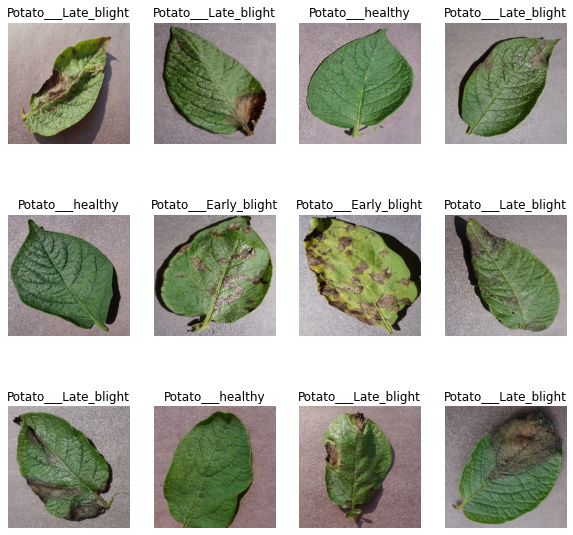

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy)
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_labels[label_batch[i]])
    plt.axis("off")

**Train/Val/Test split**

In [ ]:
DATASET_SIZE = len(dataset)
train_size = int(0.8 * DATASET_SIZE)
val_size = int(0.10 * DATASET_SIZE)
test_size = int(0.10 * DATASET_SIZE)
dataset = dataset.shuffle(1000, seed=12)
train_dataset = dataset.take(train_size)
print(len(train_dataset))
test_dataset = dataset.skip(train_size)
print(len(test_dataset))
val_dataset = test_dataset.take(val_size)
print(len(val_dataset))
test_dataset = test_dataset.skip(test_size)
print(len(test_dataset))

54
14
6
8


**Get data by batch size**

In [ ]:
train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

**Feature scaling and data augmentation**

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

**CNN architecture**

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes=3
model = models.Sequential([
        resize_and_rescale,
        layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [ ]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

Epoch 1/50
54/54 [==============================] - 19s 350ms/step - loss: 0.1809 - accuracy: 0.9346 - val_loss: 0.1548 - val_accuracy: 0.9375
Epoch 2/50
54/54 [==============================] - 19s 349ms/step - loss: 0.1552 - accuracy: 0.9404 - val_loss: 0.1435 - val_accuracy: 0.9531
Epoch 3/50
54/54 [==============================] - 19s 348ms/step - loss: 0.1919 - accuracy: 0.9248 - val_loss: 0.2424 - val_accuracy: 0.9167
Epoch 4/50
54/54 [==============================] - 19s 349ms/step - loss: 0.1853 - accuracy: 0.9311 - val_loss: 0.1575 - val_accuracy: 0.9271
Epoch 5/50
54/54 [==============================] - 19s 349ms/step - loss: 0.1566 - accuracy: 0.9346 - val_loss: 0.1789 - val_accuracy: 0.9167
Epoch 6/50
54/54 [==============================] - 19s 348ms/step - loss: 0.1430 - accuracy: 0.9439 - val_loss: 0.1770 - val_accuracy: 0.9323
Epoch 7/50
54/54 [==============================] - 19s 348ms/step - loss: 0.1388 - accuracy: 0.9543 - val_loss: 0.1126 - val_accuracy: 0.9479

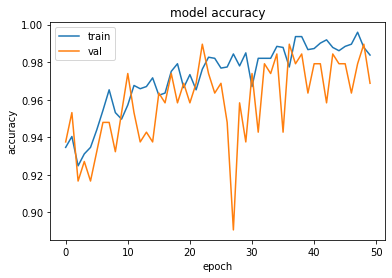

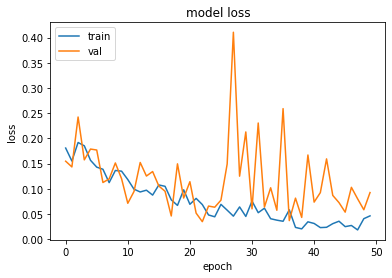

In [ ]:
with tf.device('/device:GPU:0'):
  history = model.fit(
      train_ds,
      epochs=EPOCHS,
      batch_size=BATCH_SIZE,
      verbose=1,
      validation_data=val_ds
  )
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  # Plot history: loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
model.evaluate(test_ds)

8/8 [==============================] - 6s 55ms/step - loss: 0.1082 - accuracy: 0.9492


[0.10821806639432907, 0.94921875]

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


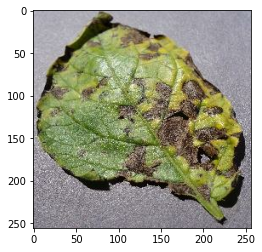

In [ ]:
from tensorflow.python.ops.gen_batch_ops import batch
for image_batch, label_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()
  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:",class_labels[first_label])

  batch_predic = model.predict(image_batch)
  print("predicted label:", class_labels[np.argmax(batch_predic[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_labels[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

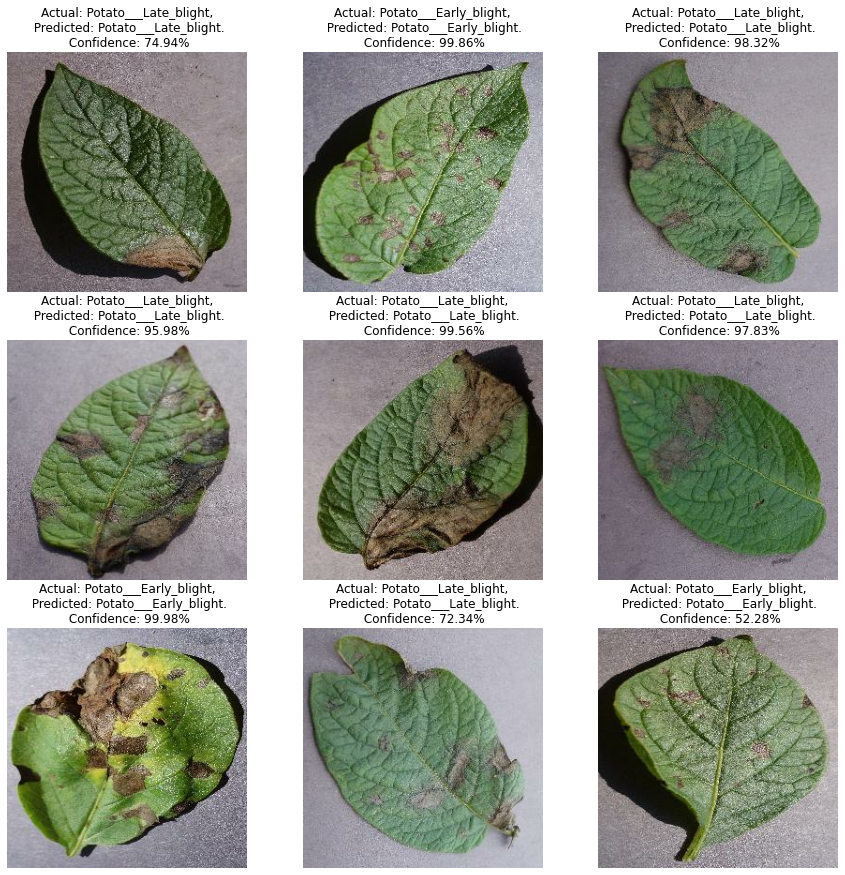

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_labels[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

**Save model**

In [ ]:
model_version = max([int(i) for i in os.listdir(KAGGLE_HOME_DIR+"/models") + [0]])+1
model.save(f"{KAGGLE_HOME_DIR}/models/{model_version}")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Patatos_Project /dataset/models/4/assets


In [ ]:
model.load_weights(f"{KAGGLE_HOME_DIR}/models/{4}")

In [ ]:
model.evaluate(test_ds)

8/8 [==============================] - 0s 51ms/step - loss: 0.1985 - accuracy: 0.9297


[0.19847020506858826, 0.9296875]